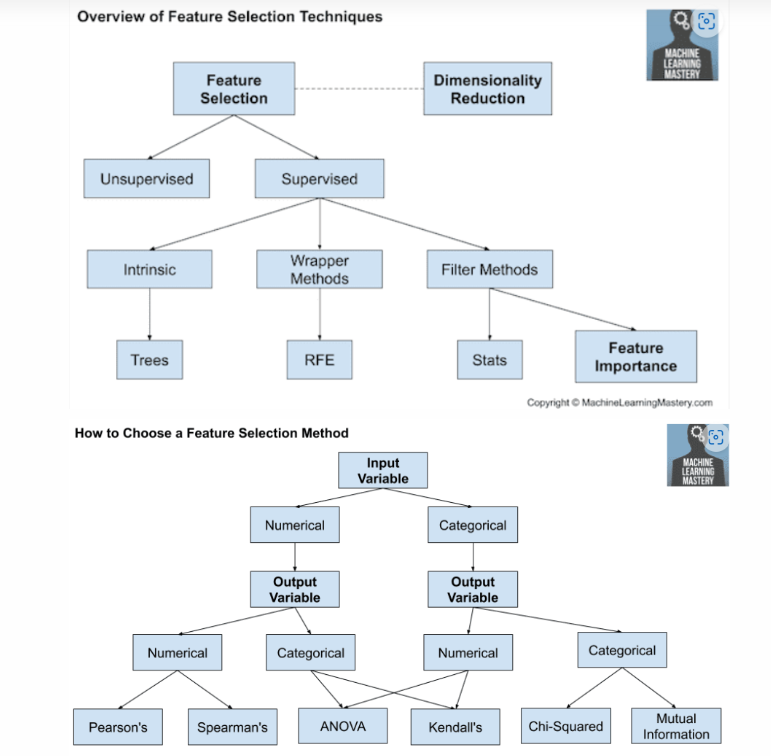

## 📌 Need for Feature Selection

Let's consider a **student dataset** 📊 with the following features (columns):
- **Name** 🏷️
- **Marks** 📊
- **Address** 📍
- **Race** 🏁
- **Religion** ✝️☪️🕉️
- **Attendance** 📅

🎯 **Objective**: Analyze the **performance of students** based on these features.

❌ Clearly, **Race** and **Religion** are **irrelevant** and do not contribute to student performance.

📊 **Comparison:**
- Training with **all features** → **60% accuracy** ❌
- Training with **only relevant features** → **80% accuracy** ✅

💡 **Key Takeaway:** Selecting only relevant features improves model accuracy significantly! 🚀

---

## 🎯 What is Feature Selection?

**Feature Selection** is the process of selecting the **most relevant features** for a machine learning model while **removing irrelevant/partially relevant** features.

📌 **Why?**

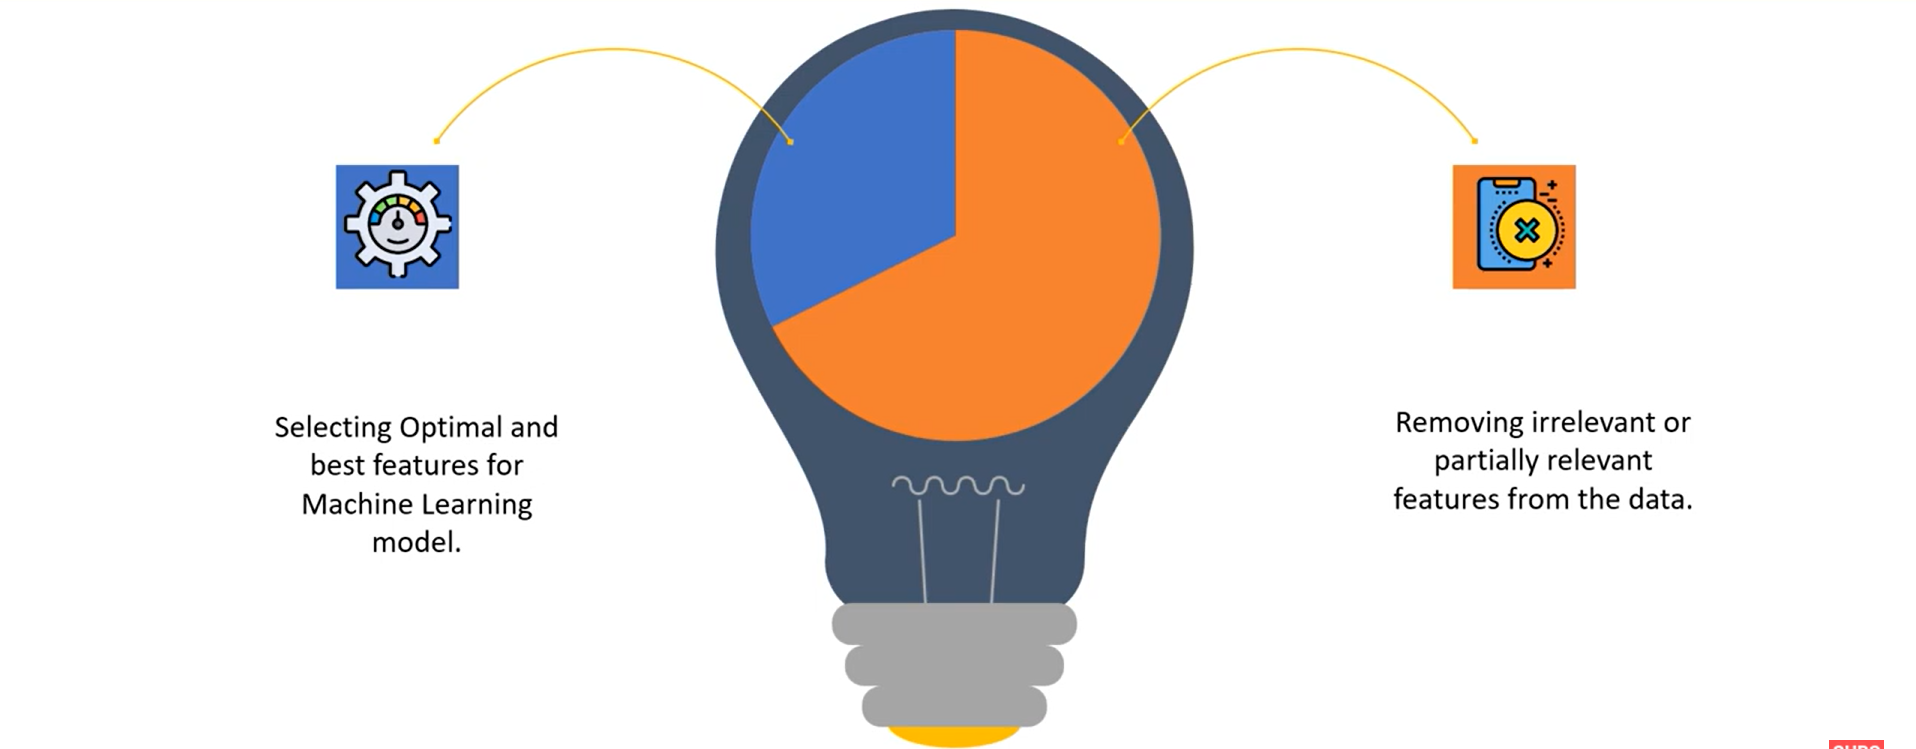

- "Garbage In, Garbage Out" – Better input features yield better results! ✅
- Helps in reducing complexity, computation time, and **improves accuracy**. 📈

---

## 🏆 Importance of Feature Selection

🔹 **Reduces Dimensionality** 🏗️ – Works only with **relevant** features.

🔹 **Minimizes Computation Cost** 💰 – Less data → Faster processing.

🔹 **Improves Model Learning** 🧠 – Provides the best features to the training algorithm.

🔹 **Enhances Accuracy** 🎯 – More accurate predictions!

---

## 📊 Feature Selection Statistics

🎯 **Feature selection depends on variable types (Categorical/Numeric):**

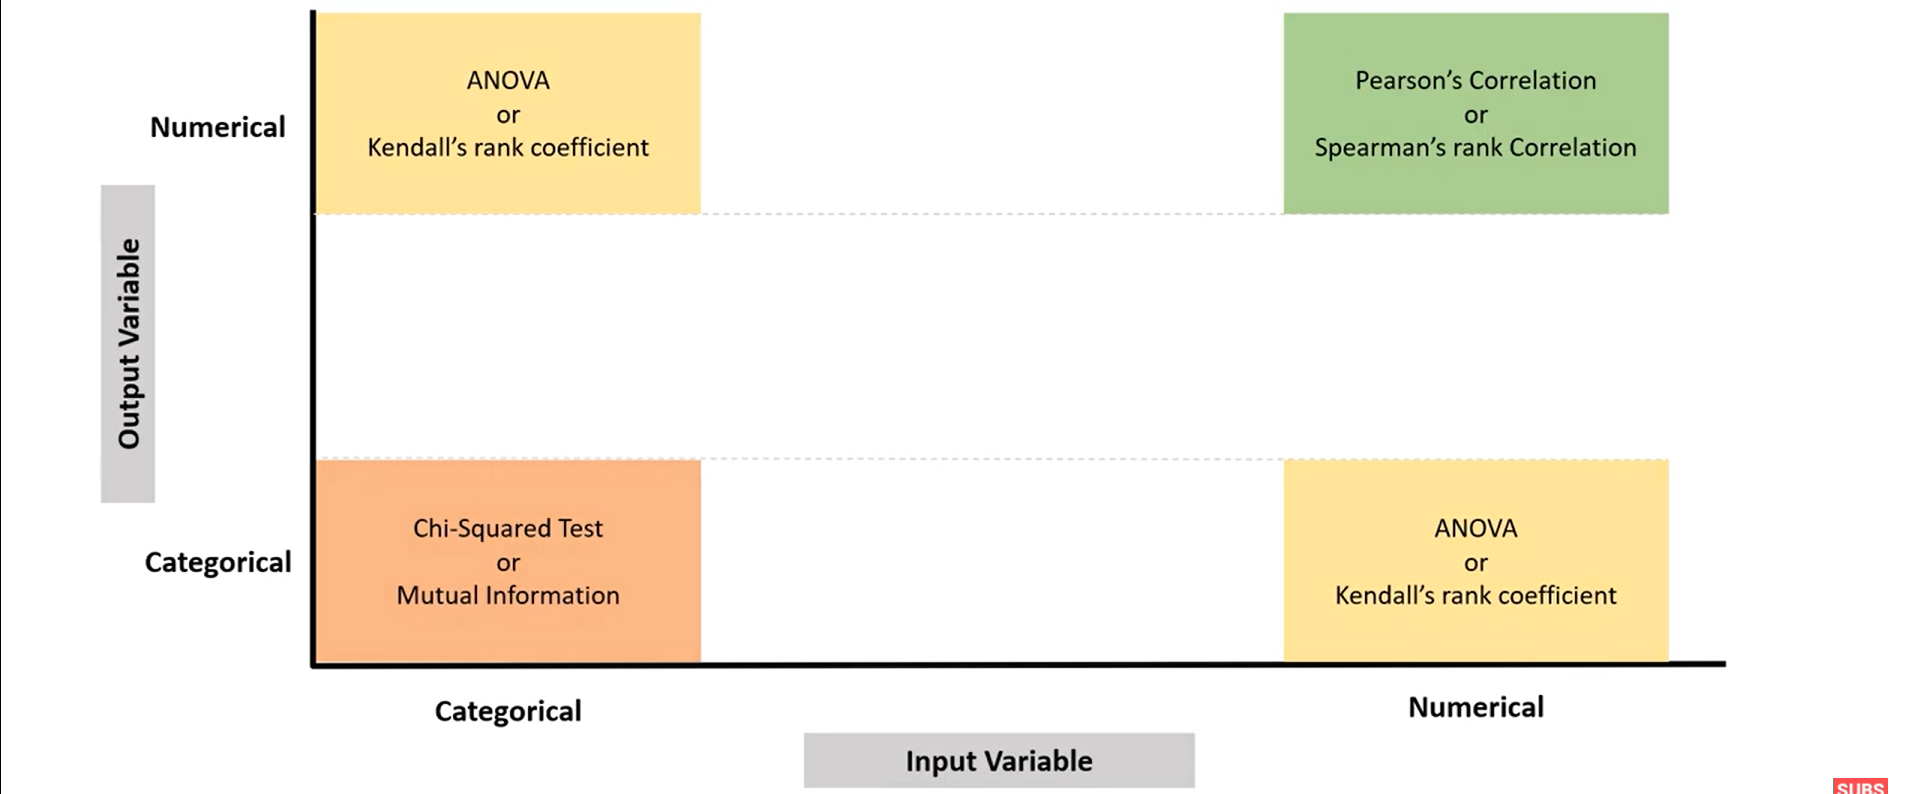

| Input Variable | Output Variable | Method Used |
|---------------|---------------|-------------|
| Categorical | Categorical | Chi-square test, Mutual Information |
| Numeric | Categorical | ANOVA, Kendall's Rank Coefficient |
| Categorical | Numeric | ANOVA, Kendall's Rank Coefficient |
| Numeric | Numeric | Pearson's Coefficient, Spearman's Rank Correlation |

📌 **These statistical techniques help in selecting the best features for different datasets.**

---

## 🛠️ Various Feature Selection Techniques

🔹 **Supervised Feature Selection** 🎯 (Uses Output Variable)
- **Filter Methods** 🧹
- **Wrapper Methods** 🎁
- **Embedded Methods** 🏗️

🔹 **Unsupervised Feature Selection** 🤖 (No Output Variable required)

📌 **Let's implement them one by one!** 👇

---

## 🏷️ Filter Methods (Preprocessing Step)

Filter methods select features based on statistical measures and are independent of any machine learning model. They are faster and computationally efficient.

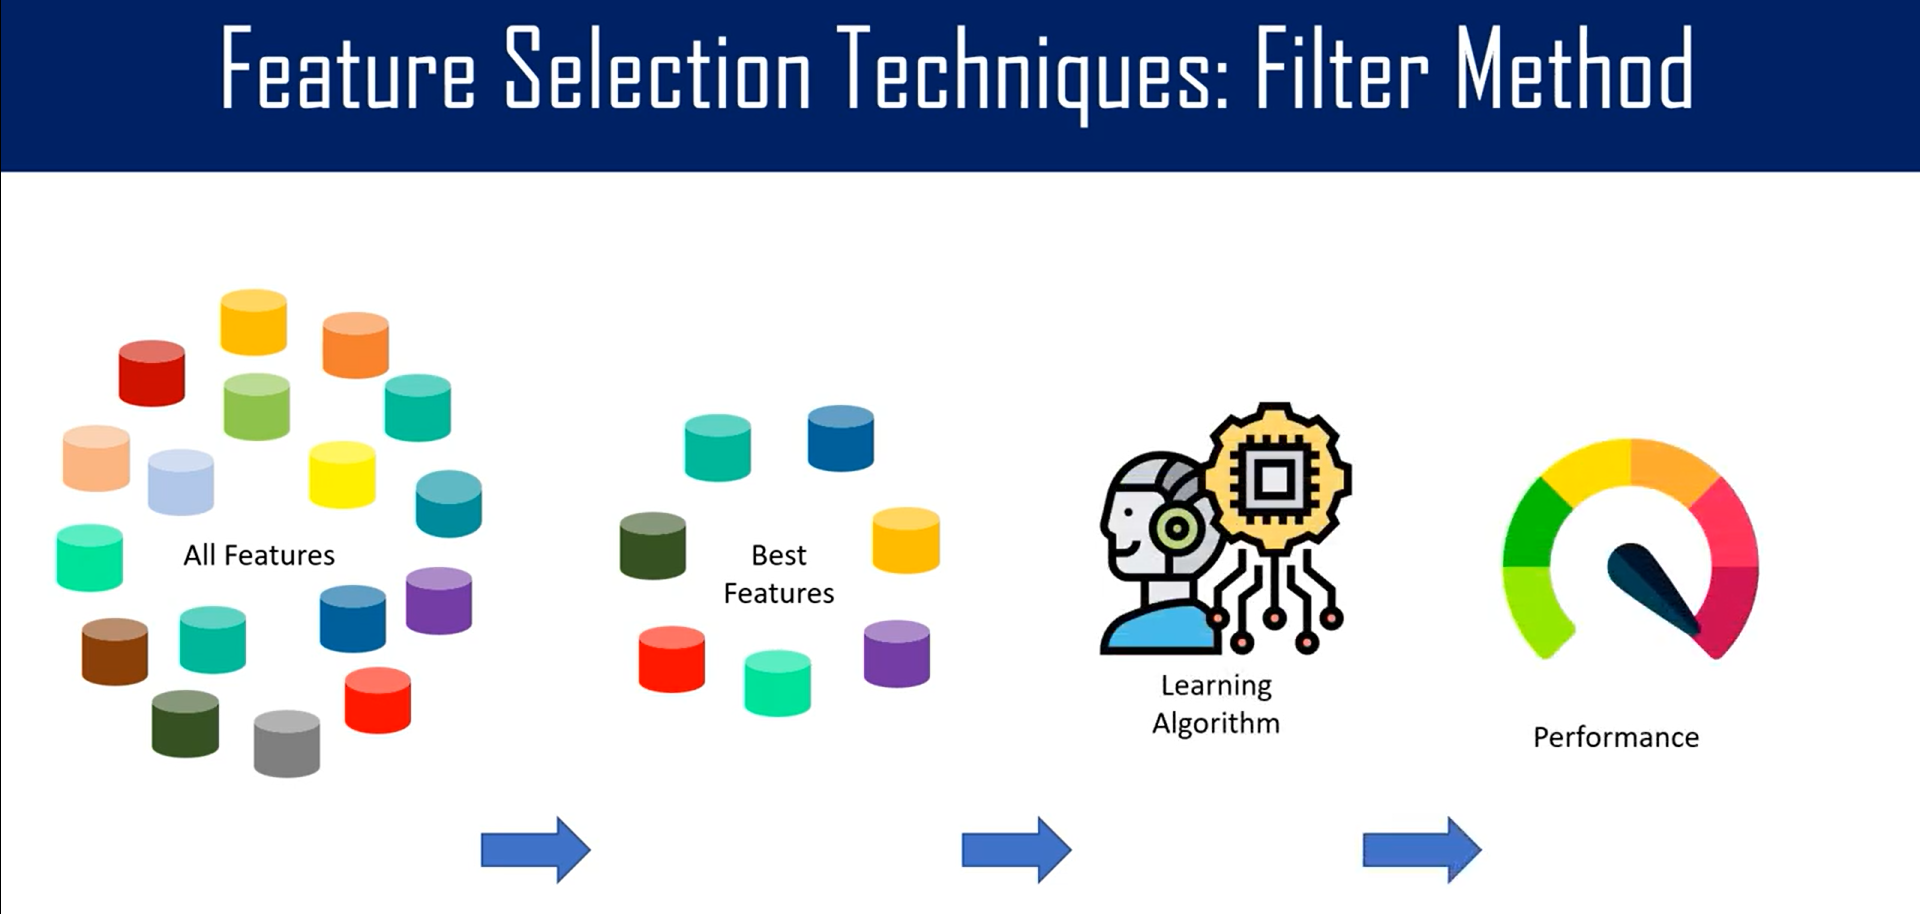

🔹 Selects features **before** training 🎯
🔹 Techniques:
1. **Information Gain** – Reduces entropy (randomness) 📉
2. **Chi-Square Test** – Determines relationships between categorical variables 📊
3. **F-Score** – Ranks features 📊
4. **Missing Value Ratio** – Filters features based on missing data ❌


**1) Information Gain**

- Measures the reduction in entropy after splitting on a particular feature.
- Example: In spam detection, a feature like "presence of money-related words" might have high information gain if it significantly separates spam from non-spam emails.

**2) Chi-Squared Test**

- Evaluates the relationship between categorical variables by measuring the independence between feature values and class labels.
- Example: If we want to check whether gender affects the likelihood of purchasing a product, we can use the Chi-Squared test.

**3) Fisher’s Score**

- Ranks features in descending order based on their discriminatory power.
- Example: In image recognition, if we want to identify the most significant pixel intensity features, Fisher’s Score helps rank them.

**4) Missing Value Ratio**

- Evaluates features based on missing data. If a feature has too many missing values, it may be removed.
- Example: If a dataset contains a column with 80% missing values, it might not be useful for predictions.



📌 **Example Implementation (Chi-Square Test)**:

In [8]:
# Importing the Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
# Loading the Data
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
features = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(data_url, names=features)

In [14]:
# Display first few rows
print(df.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


In [16]:
# Checking the shape of the dataset
print(df.shape)

(768, 9)


In [18]:
# Preparing the Data
data = df.values
X = data[:, :8]  # Selecting all columns except the last one (features)
Y = data[:, 8]   # Selecting the last column as target (class label)

In [20]:
# Feature extraction using Chi-Squared Test (Filter Method)
chi_best = SelectKBest(score_func=chi2, k=4)
k_best = chi_best.fit(X, Y)

In [22]:
# Summarizing feature scores
np.set_printoptions(precision=3)
print("Feature Scores:", k_best.scores_)

Feature Scores: [ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]


In [24]:
# Selecting the top 4 features
k_features = k_best.transform(X)

In [26]:
# Displaying the selected features
print("Selected Features (first 5 rows):")
print(k_features[:5, :])

Selected Features (first 5 rows):
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


## 🎁 Wrapper Methods (Iterative Search)

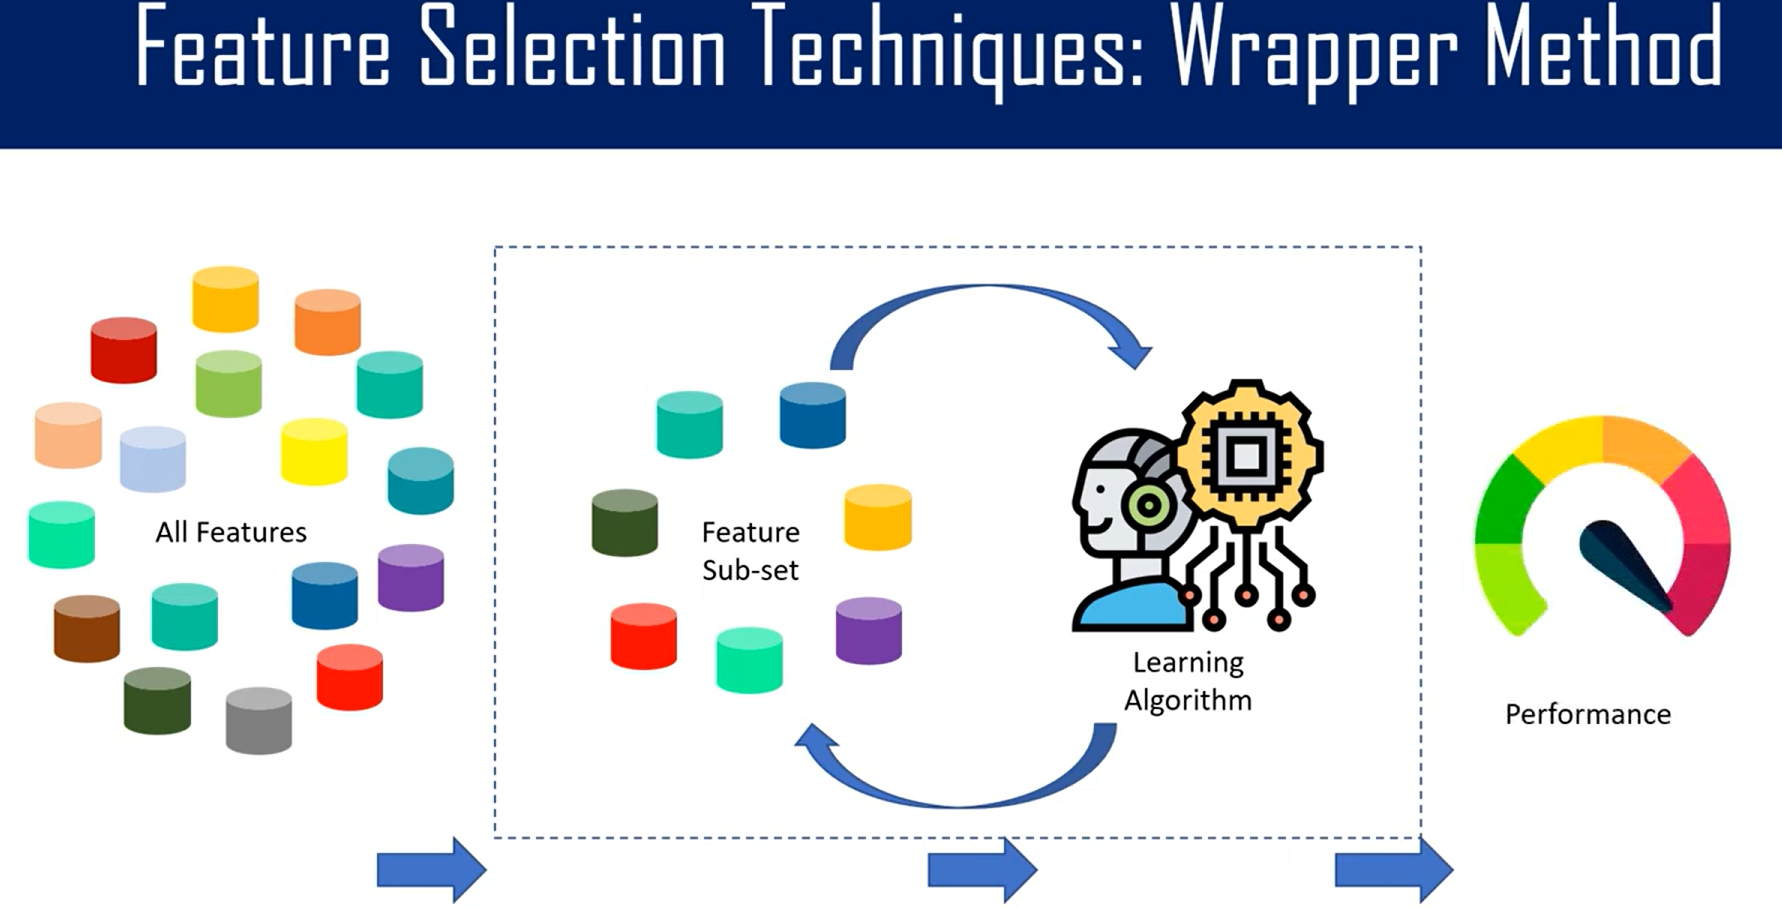

🔹 **Iterative feature selection**
🔹 **Types:**
1. **Forward Selection** ➡️ Adds features one by one 👆
2. **Backward Elimination** ⬅️ Removes least significant features 👇
3. **Exhaustive Selection** 🔎 Evaluates all feature combinations 📊
4. **Recursive Feature Elimination (RFE)** 🔄 Recursively removes weak features

**1) Forward Selection**

Starts with no features and adds the most important one at each step, evaluating performance.
Example: Suppose we are predicting house prices. We start with no features, then add "number of bedrooms," check performance, then add "square footage," and continue until adding more features no longer improves accuracy.

**2) Backward Elimination**

Starts with all features and removes the least significant one at each step.
Example: In a customer churn model, we start with all possible features (age, income, usage time, complaints) and remove the least useful one iteratively.

**3) Exhaustive Feature Selection**

Tries every possible combination of features and selects the best.
Example: If we have 10 features, this method will try all subsets (1 feature, 2 features, ..., all 10 features) to find the optimal set.

**4) Recursive Feature Elimination (RFE)**

Uses a recursive greedy optimization approach, removing the least important features and re-evaluating the model iteratively.
Example: In a medical diagnosis model, RFE can help eliminate unimportant genetic markers from a dataset with thousands of features.


📌 **Example (RFE with Logistic Regression)**:

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression Model with increased iterations
model = LogisticRegression(max_iter=500)

# Recursive Feature Elimination (RFE)
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_scaled, Y)

# Selected features and ranking
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)


Selected Features: [ True  True False False False  True False False]
Feature Ranking: [1 1 3 6 5 1 2 4]


✅ **Selects the top 3 features**

## 🏗️ Embedded Methods (Best of Both Worlds)

Embedded methods **combine the benefits of Filter and Wrapper methods** to select the best features while maintaining computational efficiency. These methods are built into machine learning models and perform feature selection **during** training.

🔹 Combines **Filter & Wrapper Methods** 🚀

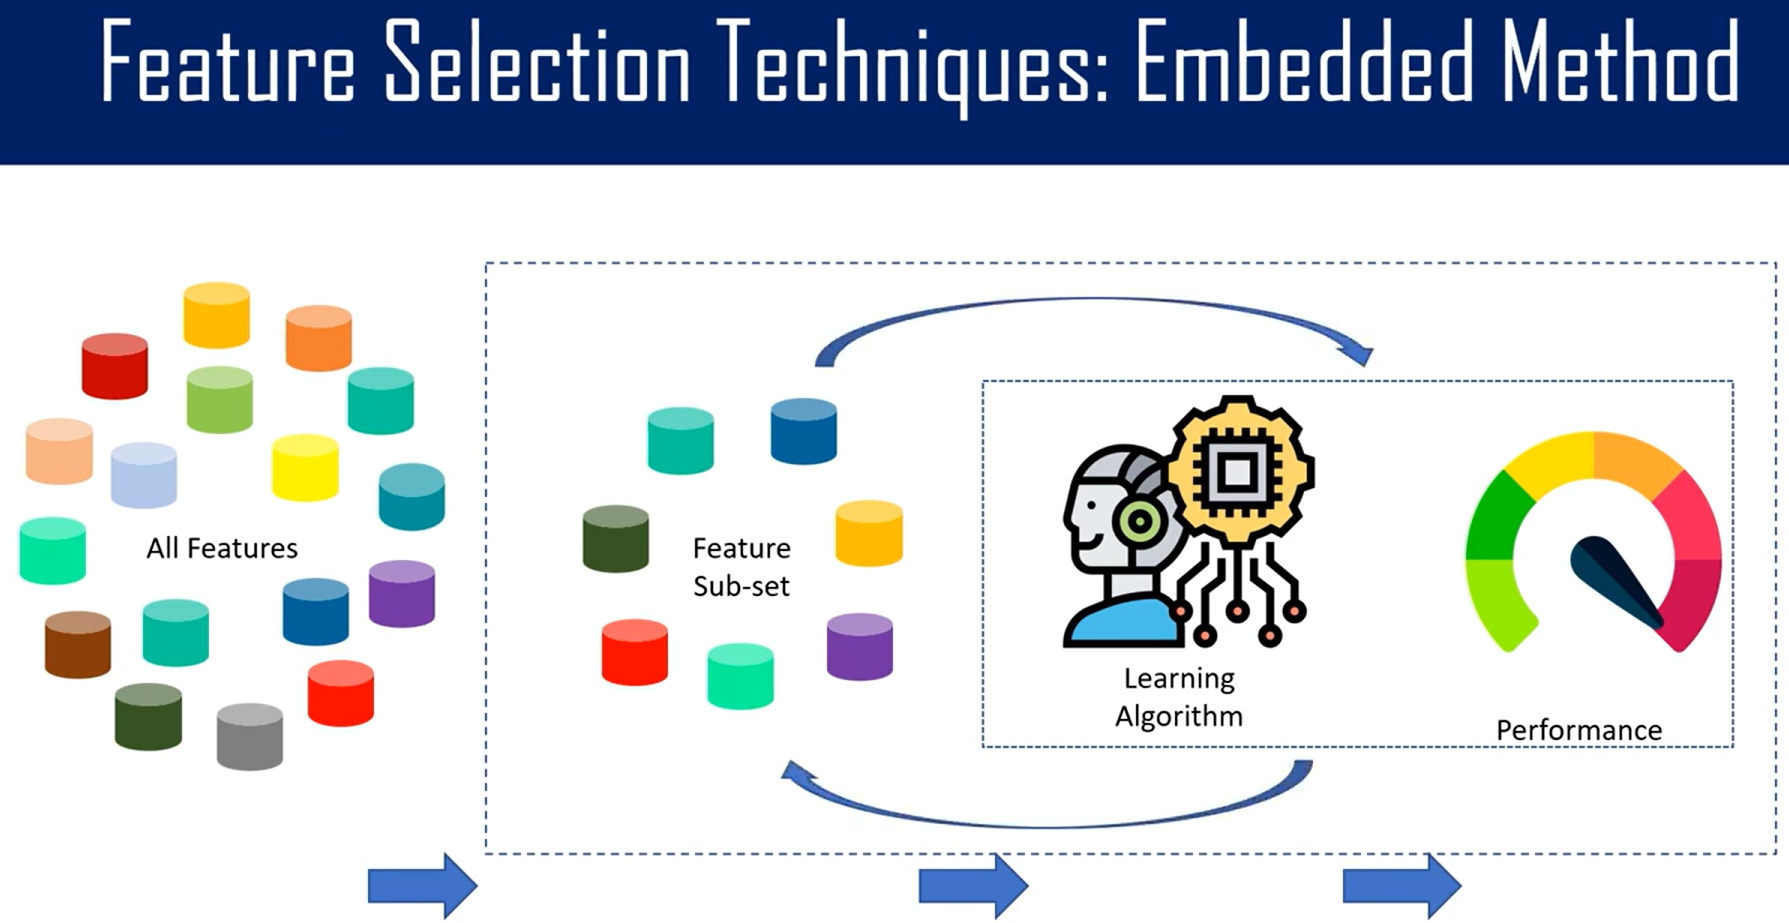

🔹 **Techniques:**

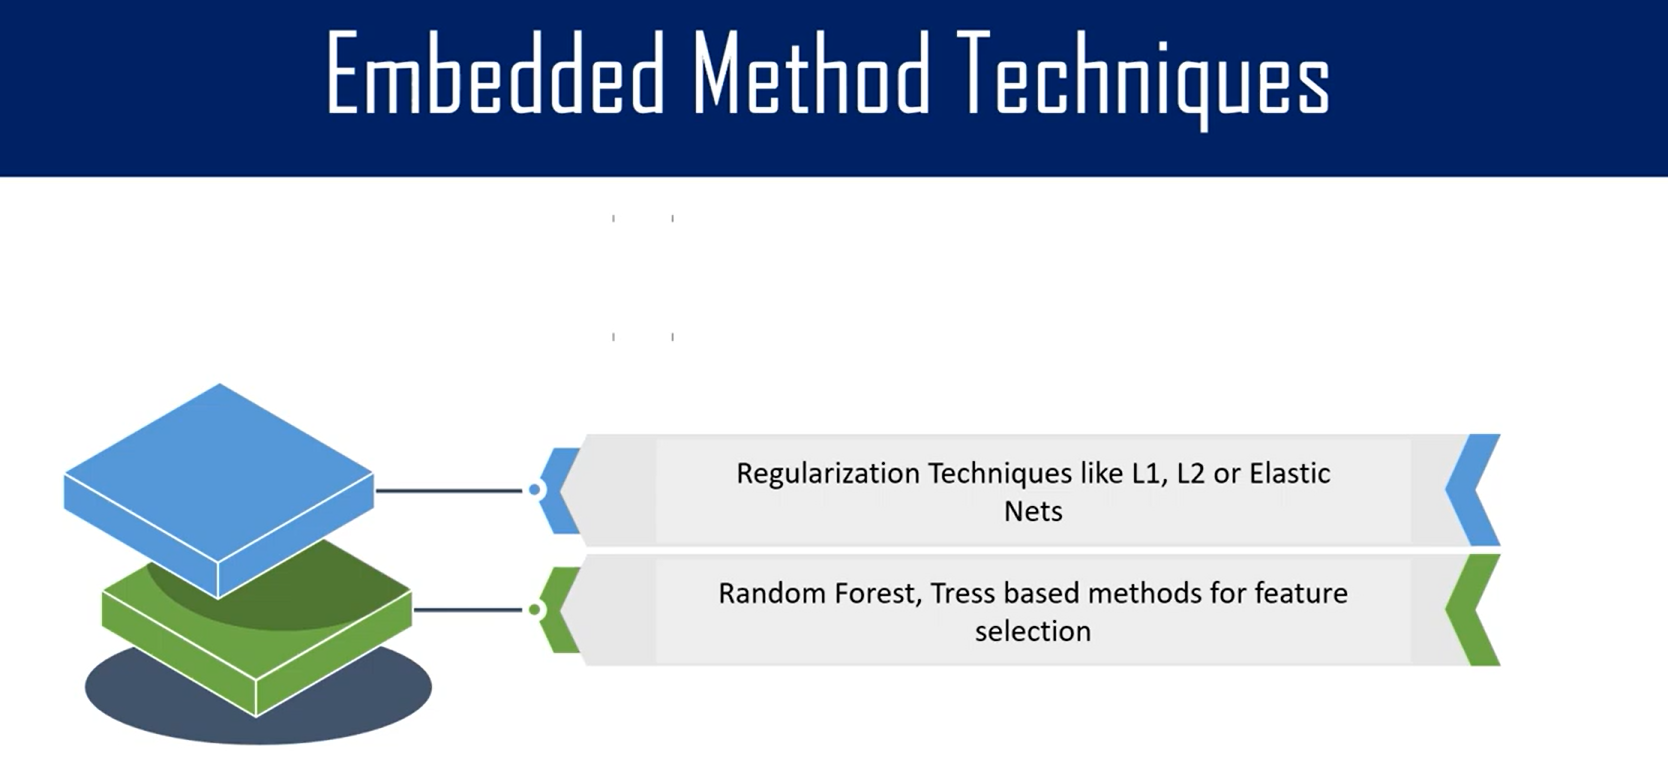

1. **Lasso Regression (L1 Regularization)** 📉
2. **Ridge Regression (L2 Regularization)** 📈
3. **Elastic Net (Combination of L1 & L2)** ⚖️
4. **Random Forest Feature Importance** 🌲

## **1️⃣ Lasso Regression (L1 Regularization) 📉**
Lasso (Least Absolute Shrinkage and Selection Operator) adds an **L1 penalty** to the regression model, which forces some coefficients to become exactly zero, effectively **removing less important features**.

- **Key Idea**: It helps in feature selection by shrinking some coefficients to zero.  
- **Best Used For**: When you want a **sparse model** (a model with fewer features).  

### ✅ **Example:**
```python
from sklearn.linear_model import Lasso
import numpy as np

# Sample data
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
Y = np.array([1, 2, 3, 4])

# Lasso Regression with L1 penalty
lasso = Lasso(alpha=0.1)  # Alpha controls regularization strength
lasso.fit(X, Y)

# Print feature importance
print("Feature Coefficients:", lasso.coef_)
```
- **If a coefficient is 0, that feature is removed from the model.**  

---

## **2️⃣ Ridge Regression (L2 Regularization) 📈**
Unlike Lasso, **Ridge Regression** adds an **L2 penalty**, which **reduces** the size of coefficients but **does not make them zero**. It prevents overfitting but does not remove features.

- **Key Idea**: Instead of setting coefficients to zero, it shrinks them, helping prevent overfitting.  
- **Best Used For**: When you have **highly correlated features**.

### ✅ **Example:**
```python
from sklearn.linear_model import Ridge

# Ridge Regression with L2 penalty
ridge = Ridge(alpha=1.0)
ridge.fit(X, Y)

# Print feature importance
print("Feature Coefficients:", ridge.coef_)
```
- **Here, all features will have non-zero values, but some may be very small.**  

---

## **3️⃣ Elastic Net (Combination of L1 & L2) ⚖️**
Elastic Net is a hybrid of **Lasso (L1) and Ridge (L2)**. It helps when Lasso removes too many features and Ridge keeps too many.

- **Key Idea**: It balances feature selection (L1) and coefficient shrinkage (L2).  
- **Best Used For**: When you need **both feature selection & regularization**.

### ✅ **Example:**
```python
from sklearn.linear_model import ElasticNet

# Elastic Net with a mix of L1 and L2 penalties
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio balances Lasso & Ridge
elastic_net.fit(X, Y)

# Print feature importance
print("Feature Coefficients:", elastic_net.coef_)
```
- **Some coefficients will be zero (like Lasso), but others will be shrunk (like Ridge).**  

---

## **4️⃣ Random Forest Feature Importance 🌲**
Tree-based models like **Random Forests** naturally rank feature importance using Gini impurity or information gain.

- **Key Idea**: It assigns importance scores based on how much each feature improves model predictions.  
- **Best Used For**: When you want **feature importance scores from a non-linear model**.

### ✅ **Example:**
```python
from sklearn.ensemble import RandomForestRegressor

# Sample data
X = np.random.rand(100, 5)  # 100 samples, 5 features
Y = np.random.rand(100)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, Y)

# Get feature importances
print("Feature Importances:", rf.feature_importances_)
```
- **Features with higher scores are more important!**  

---

## **💌 Summary Table of Embedded Methods**
| Method | Feature Selection? | Shrinks Coefficients? | Handles Correlated Features? | Works Well With |
|--------|--------------------|----------------------|----------------------------|----------------|
| **Lasso (L1)** | ✅ Yes | ✅ Yes (some to zero) | ❌ No | High-dimensional sparse data |
| **Ridge (L2)** | ❌ No | ✅ Yes (none to zero) | ✅ Yes | When features are correlated |
| **Elastic Net** | ✅ Yes | ✅ Yes | ✅ Yes | Best when Lasso is too aggressive |
| **Random Forest** | ✅ Yes | ❌ No | ✅ Yes | Non-linear relationships |

---

## 🚀 **Conclusion**
- **Lasso** helps with feature selection by removing less important features.  
- **Ridge** prevents overfitting by shrinking but **not removing** features.  
- **Elastic Net** balances **Lasso + Ridge**, useful for real-world problems.  
- **Random Forest Feature Importance** is great for **non-linear feature selection**.  

### **Which One Should You Use?**
- **If you need feature selection → Lasso / Elastic Net**
- **If you want to reduce overfitting → Ridge**
- **If your features are correlated → Ridge / Elastic Net**
- **If you’re working with tree-based models → Random Forest Feature Importance**

In [41]:
# Import necessary libraries
from sklearn.linear_model import Ridge
import numpy as np

# Define and fit the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # Alpha is the regularization strength
ridge_reg.fit(X, Y)  # Fit the model with feature matrix X and target variable Y

# Define a helper function for printing coefficients
def print_coefs(coef, names=None, sort=False):
    if names is None:
        names = ["X%s" % x for x in range(len(coef))]  # Assign feature names as X0, X1, X2, etc.
    
    lst = zip(coef, names)  # Pair coefficients with feature names

    if sort:
        lst = sorted(lst, key=lambda x: np.abs(x[0]))  # Sort coefficients based on absolute values
    
    return " + ".join("%s * %s" % (round(coefs, 3), name) for coefs, name in lst)

# Print the Ridge model coefficients
print("Ridge model:", print_coefs(ridge_reg.coef_))


Ridge model: 0.021 * X0 + 0.006 * X1 + -0.002 * X2 + 0.0 * X3 + -0.0 * X4 + 0.013 * X5 + 0.145 * X6 + 0.003 * X7


## 🎯 Conclusion

🎉 **Key Takeaways:**
✅ Feature Selection **improves accuracy** 📊
✅ **Reduces computation cost** 💰
✅ **Enhances interpretability** 🧐
✅ **Different techniques** work for different datasets 🧠

💡 **Tip:** Try different **Feature Selection** techniques & find what works best for your model! 🚀